# Telcom Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Dell/Desktop/Data Science/Customer Churn Prediction/Churn.csv")

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### EDA

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not.

In [7]:
df.drop(["customerID"], inplace = True, axis = 1)

#### gender

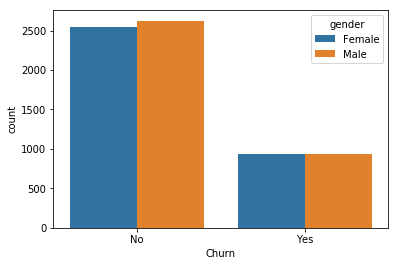

In [8]:
sns.countplot(x='Churn', hue = 'gender', data=df)

As we can see there is no difference based on gender

#### SeniorCitizen

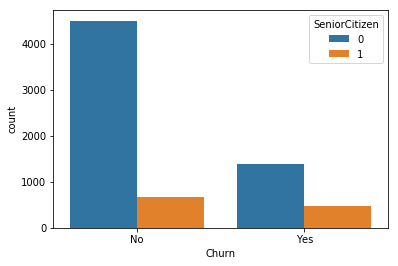

In [9]:
sns.countplot(x='Churn', hue = 'SeniorCitizen', data=df)

#### Partner and Dependents

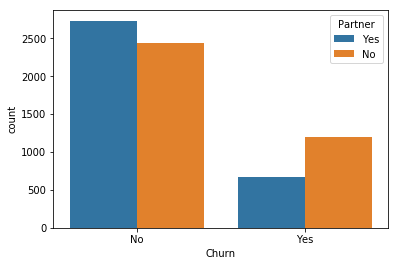

In [10]:
sns.countplot(x='Churn', hue = 'Partner', data=df)

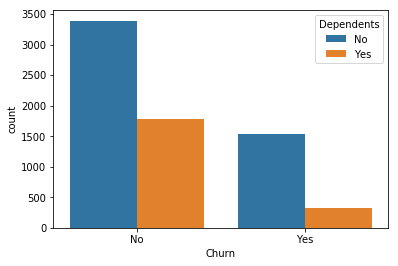

In [11]:
sns.countplot(x='Churn', hue = 'Dependents', data=df)

As we can see if the person has a partner and dependents, then he or she is less likely to churn

#### Tenure

In [12]:
df['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [13]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [14]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

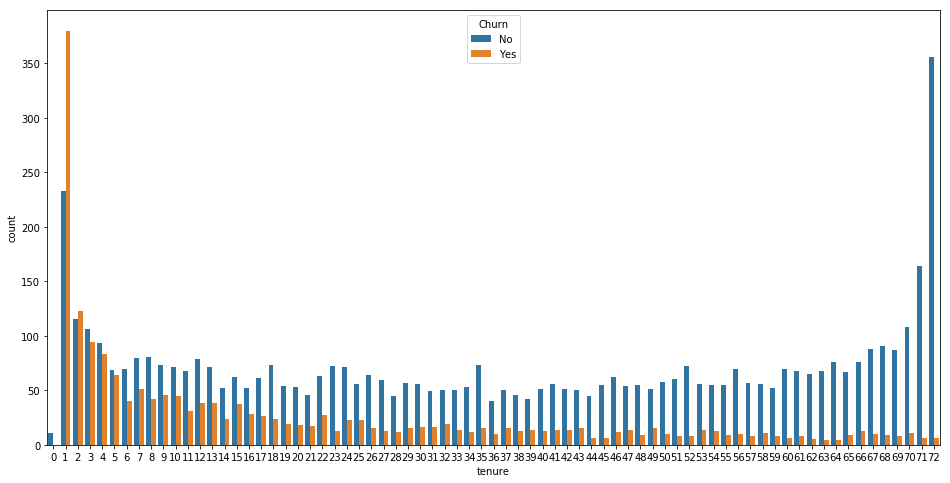

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate.

In [16]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [17]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

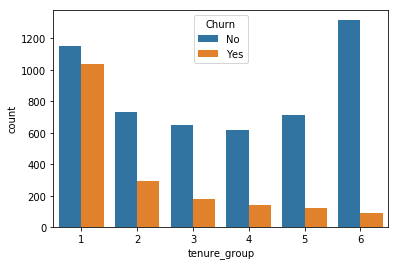

In [18]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

#### Phone Service

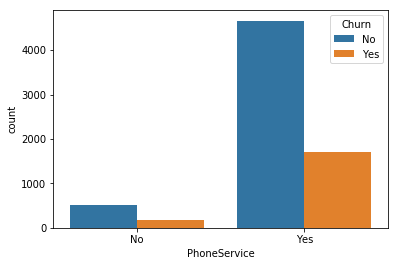

In [19]:
sns.countplot(x="PhoneService", hue="Churn", data=df)

#### MultipleLines

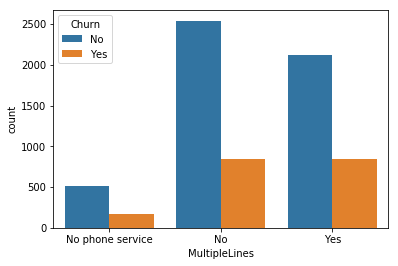

In [20]:
sns.countplot(x="MultipleLines", hue="Churn", data=df)

In [21]:
df["MultipleLines"] = df["MultipleLines"].replace({'No phone service' : 'No'})

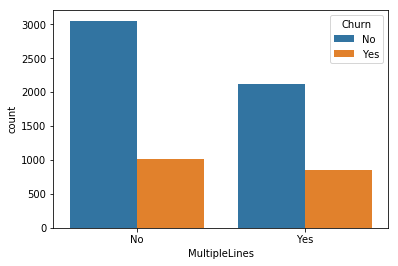

In [22]:
sns.countplot(x="MultipleLines", hue="Churn", data=df)

#### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

All of these variables have "No Internet Service" as category. We can convert them as "No"

In [23]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for i in cols:
    df[i] = df[i].replace({"No internet service": "No"})

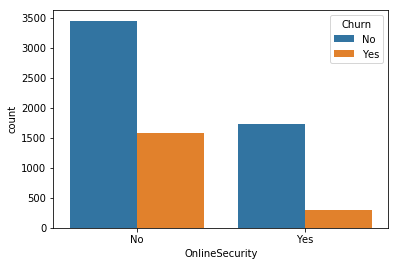

In [24]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)

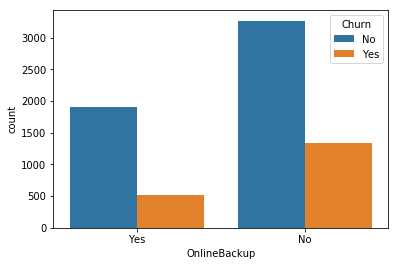

In [25]:
sns.countplot(x="OnlineBackup", hue="Churn", data=df)

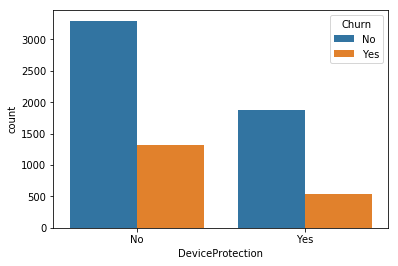

In [26]:
sns.countplot(x="DeviceProtection", hue="Churn", data=df)

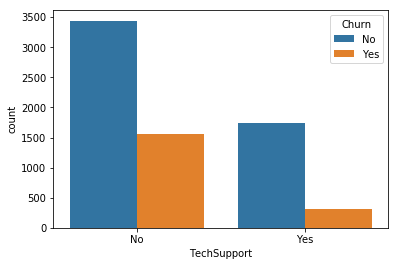

In [27]:
sns.countplot(x="TechSupport", hue="Churn", data=df)

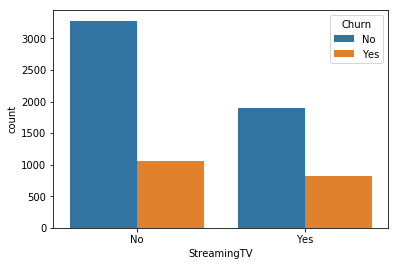

In [28]:
sns.countplot(x="StreamingTV", hue="Churn", data=df)

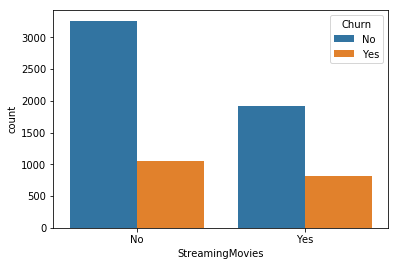

In [29]:
sns.countplot(x="StreamingMovies", hue="Churn", data=df)

#### InternetService

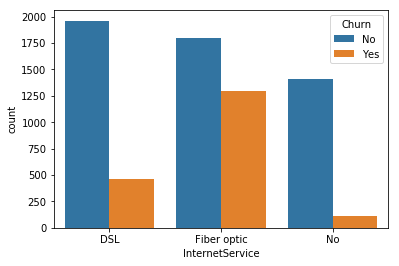

In [30]:
sns.countplot(x="InternetService", hue="Churn", data=df)

When the internet service is Fiber Optic, the churn rate is very high.

#### Contract

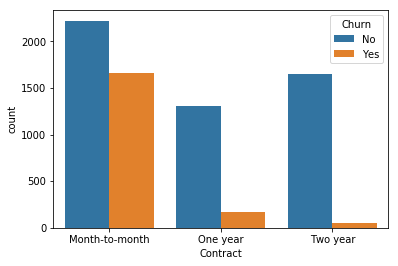

In [31]:
sns.countplot(x="Contract", hue="Churn", data=df)

In the case of Month-to-month contract Churn rate is very high.

#### PaymentMethod

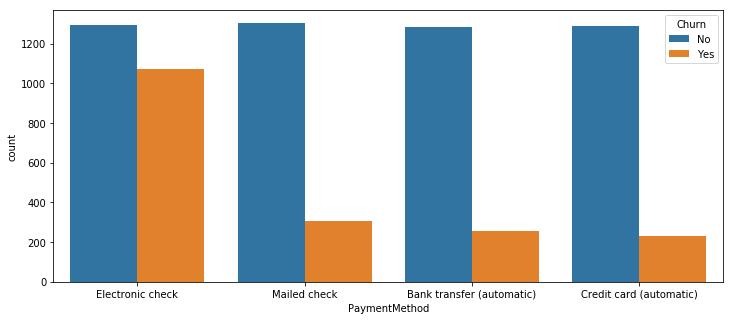

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)

In the case of Electronic check, churn is very high. 

#### PaperlessBilling

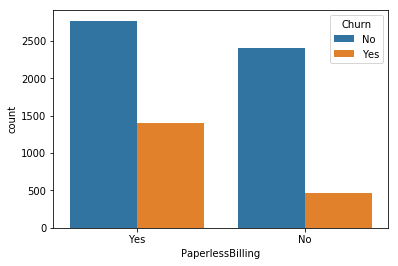

In [33]:
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)

#### TotalCharges

In [34]:
df.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [35]:
df.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [36]:
df["TotalCharges"].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [37]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [38]:
df['TotalCharges'].isna().sum() 

11

In [39]:
df = df[df["TotalCharges"].notnull()]

In [40]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [41]:
Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


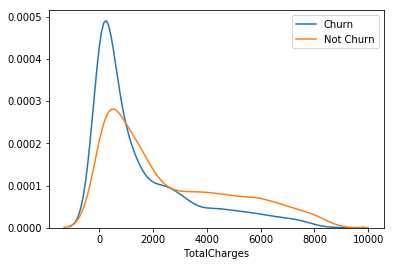

In [42]:
sns.distplot(Churn["TotalCharges"], hist=False, label = "Churn")
sns.distplot(Not_Churn["TotalCharges"], hist=False, label = "Not Churn")

#### Monthly Charges

In [43]:
df.MonthlyCharges.head(10)

0     29.85
1     56.95
2     53.85
3     42.30
4     70.70
5     99.65
6     89.10
7     29.75
8    104.80
9     56.15
Name: MonthlyCharges, dtype: float64

In [44]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [45]:
df.MonthlyCharges.isna().sum()

0

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


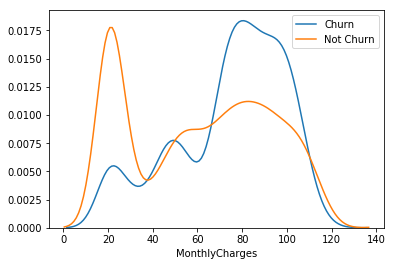

In [46]:
sns.distplot(Churn["MonthlyCharges"], hist=False, label = "Churn")
sns.distplot(Not_Churn["MonthlyCharges"], hist=False, label = "Not Churn")

## Finding Correlation

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


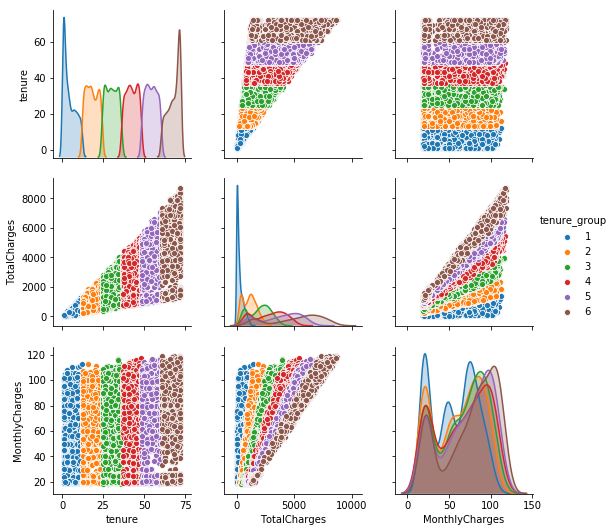

In [47]:
sns.pairplot(df, vars = ['tenure','TotalCharges','MonthlyCharges'], hue = 'tenure_group')

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


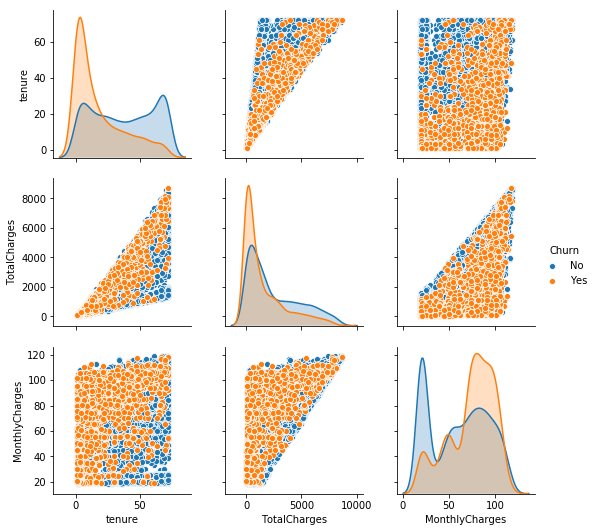

In [48]:
sns.pairplot(df, vars = ['tenure','TotalCharges','MonthlyCharges'], hue = 'Churn')

In [49]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group          int64
dtype: object

In [50]:
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling']

for i in cols:
    df[i] = df[i].apply(lambda x: 0 if x=='No' else 1)

In [51]:
catcols = df.columns[df.dtypes == object]
numcols = df.columns[df.dtypes != object]
print(catcols)
print(numcols)

Index(['gender', 'Contract', 'PaymentMethod', 'Churn'], dtype='object')
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'tenure_group'],
      dtype='object')


In [52]:
numcols = numcols.drop('tenure_group')
catcols = catcols.drop('Churn')

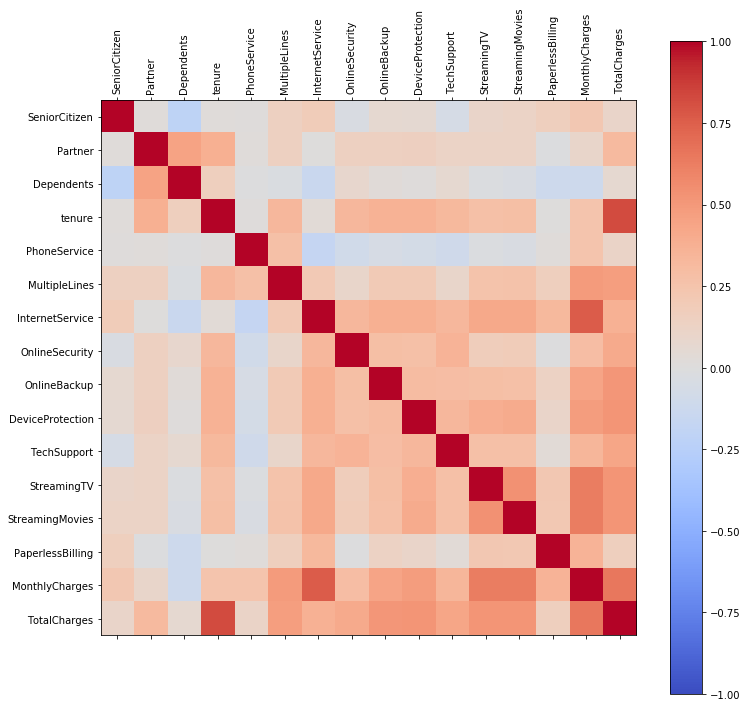

In [53]:
corr = df[numcols].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df[numcols].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df[numcols].columns)
ax.set_yticklabels(df[numcols].columns)
plt.show()

In [54]:
df = pd.get_dummies(df, columns=catcols)

In [55]:
df.shape

(7032, 27)

In [56]:
df.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,tenure_group,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,1,0,...,1,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,...,3,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,...,1,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,...,4,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,1,0,0,1,...,1,1,0,1,0,0,0,0,1,0
6,0,0,1,22,1,1,1,0,1,0,...,2,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,1,0,0,...,1,1,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,1,0,0,1,...,3,1,0,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,1,0,...,6,0,1,0,1,0,1,0,0,0


In [57]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)

In [58]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Visualizing data with Principal Components

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(df)

In [61]:
pca_df

array([[-2.25386020e+03, -8.85168355e+00],
       [-3.93823793e+02, -6.25638153e+00],
       [-2.17535000e+03,  1.19168254e+01],
       ...,
       [-1.93719752e+03, -1.46947728e+01],
       [-1.97671994e+03,  2.86975798e+01],
       [ 4.56150116e+03,  4.47896494e+00]])

In [62]:
pca_df.shape

(7032, 2)

In [63]:
pca.explained_variance_

array([5.13905009e+06, 6.28482407e+02])

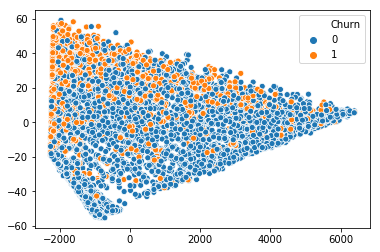

In [64]:
sns.scatterplot(x=pca_df[:,0],y= pca_df[:,1], hue = df.Churn)

## Model Building

### Baseline Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [66]:
#removing 'tenure' as we have 'tenure_group'
df.drop(['tenure'],axis=1,inplace=True)

In [67]:
train,test = train_test_split(df,test_size=0.2,random_state=111)

In [68]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [69]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1015
           1       0.65      0.51      0.57       392

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy   Score :  0.7860696517412935
Area under curve :  0.7014074595355383 



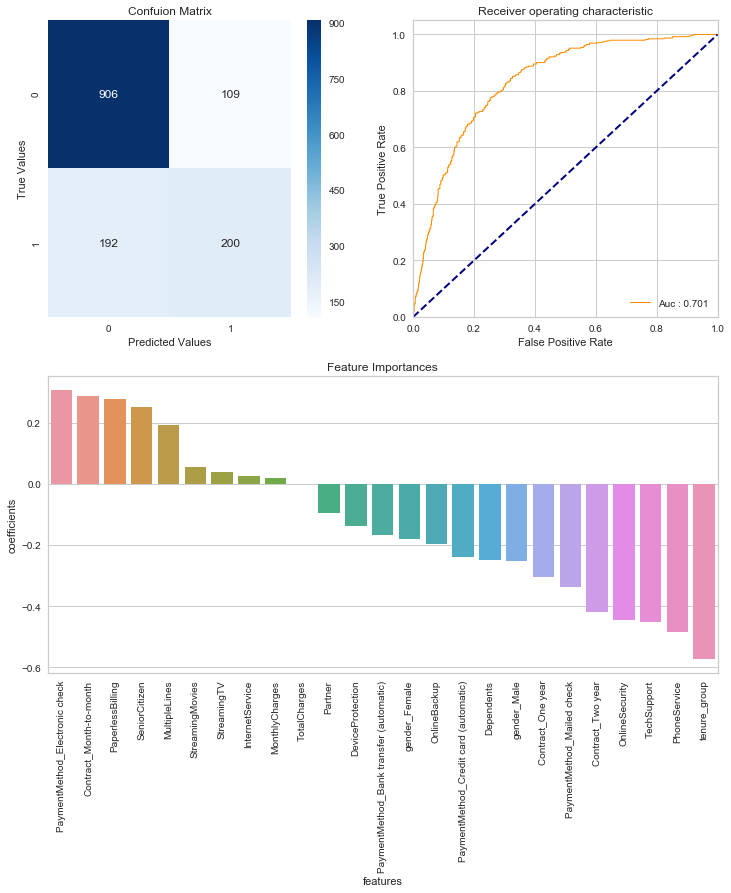

In [70]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit,train_x, train_y, test_x, test_y,
                         x,"coefficients")

### SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1015
           1       0.53      0.78      0.63       392

   micro avg       0.75      0.75      0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

Accuracy   Score :  0.7469793887704336
Area under curve :  0.7580840957072484 



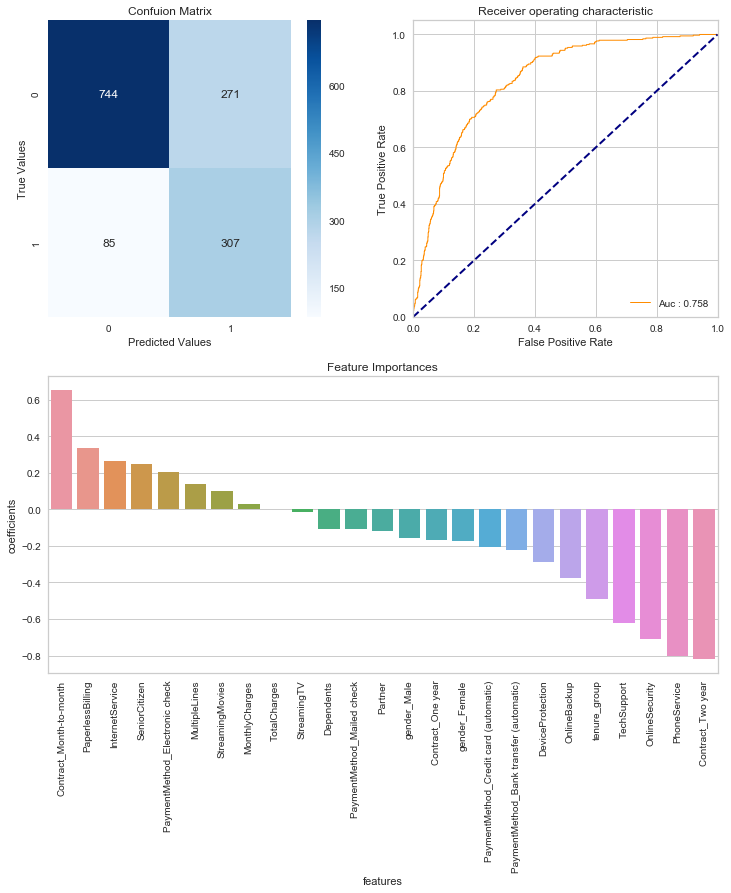

In [73]:
churn_prediction(logit,x_train_r, y_train_r, test_x, test_y,
                         x,"coefficients")